# Homework 1
Evelina Teran, Kevin Smith

In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

## 1a

In [15]:
file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/MADELON"
train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
train_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)


In [16]:
depths = list(range(1, 13))
train_errors = []
test_errors = []

for i in depths:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(train, train_labels)

    train_pred = clf.predict(train)
    test_pred = clf.predict(test)

    train_error = 1 - accuracy_score(train_labels, train_pred)
    test_error = 1 - accuracy_score(test_labels, test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

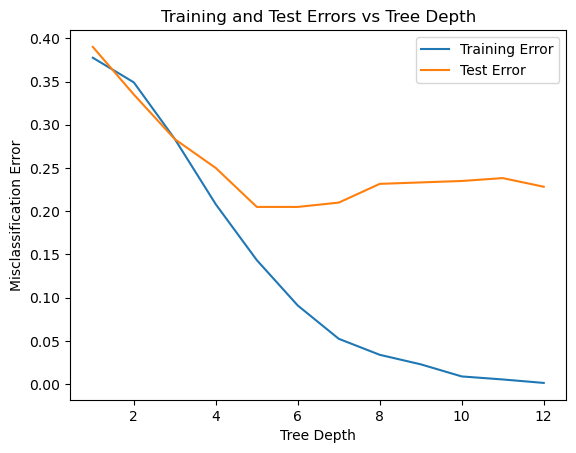

Minimum Test Error: 0.20499999999999996
Corresponding Tree Depth: 5


In [17]:
# Plot the errors
plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Tree Depth')
plt.legend()
plt.savefig("1a.png")
plt.show()

# Find the minimum test error and its corresponding depth
min_test_error = min(test_errors)
min_depth = depths[test_errors.index(min_test_error)]

# Report results
print(f"Minimum Test Error: {min_test_error}")
print(f"Corresponding Tree Depth: {min_depth}")

## 1b

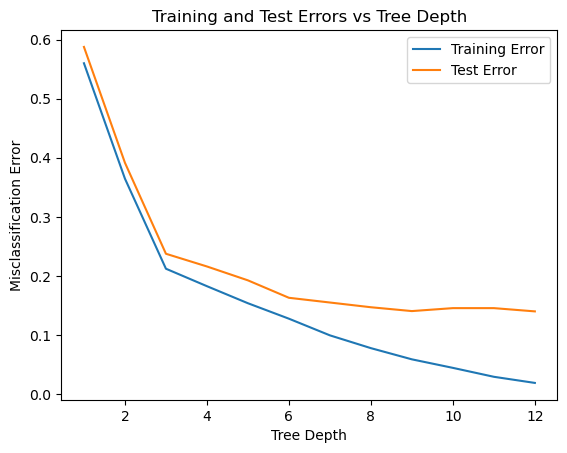

Minimum Test Error: 0.14
Corresponding Tree Depth: 12


In [18]:
file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/satimage"
train = pd.read_csv(file_loc + "/sat_train_data.csv", header = None)
train_labels = pd.read_csv(file_loc + "/sat_train_labels.csv", header = None)
test = pd.read_csv(file_loc + "/sat_test_data.csv", header = None)
test_labels = pd.read_csv(file_loc + "/sat_test_labels.csv", header = None)

depths = list(range(1, 13))
train_errors = []
test_errors = []

for i in depths:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf = clf.fit(train, train_labels)

    train_pred = clf.predict(train)
    test_pred = clf.predict(test)

    train_error = 1 - accuracy_score(train_labels, train_pred)
    test_error = 1 - accuracy_score(test_labels, test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Plot the errors
plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Tree Depth')
plt.legend()
plt.savefig("1b.png")
plt.show()

# Find the minimum test error and its corresponding depth
min_test_error = min(test_errors)
min_depth = depths[test_errors.index(min_test_error)]

# Report results
print(f"Minimum Test Error: {min_test_error}")
print(f"Corresponding Tree Depth: {min_depth}")

## 1c

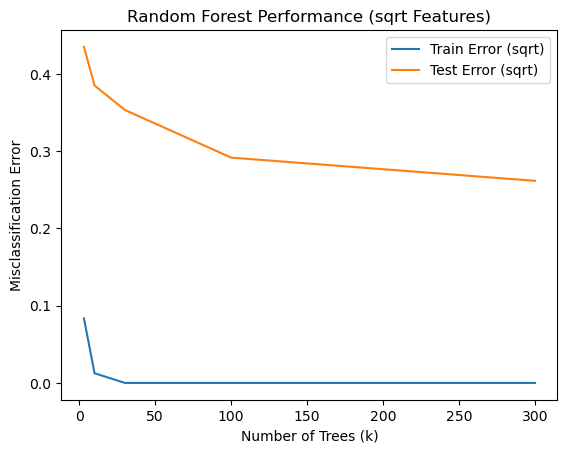

Table for c):
     K  Train Error (sqrt)  Test Error (sqrt)
0    3              0.0835           0.435000
1   10              0.0125           0.385000
2   30              0.0000           0.353333
3  100              0.0000           0.291667
4  300              0.0000           0.261667


In [19]:


file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/MADELON"
train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
train_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)


k_values = [3, 10, 30, 100, 300]
sqrt_features = int(np.sqrt(500))


# Combine features and labels
train['Class'] = train_labels
test['Class'] = test_labels

# c) Random subset of sqrt(500) features
k_values = [3, 10, 30, 100, 300]
sqrt_features = int(np.sqrt(500))

train_errors_c = []
test_errors_c = []

for k in k_values:
    model = RandomForestClassifier(n_estimators=k, max_features=sqrt_features)
    model.fit(train.drop('Class', axis=1), train['Class'])
    
    train_pred = model.predict(train.drop('Class', axis=1))
    test_pred = model.predict(test.drop('Class', axis=1))
    
    train_error = 1 - accuracy_score(train['Class'], train_pred)
    test_error = 1 - accuracy_score(test['Class'], test_pred)
    
    train_errors_c.append(train_error)
    test_errors_c.append(test_error)

# Plot errors
plt.plot(k_values, train_errors_c, label='Train Error (sqrt)')
plt.plot(k_values, test_errors_c, label='Test Error (sqrt)')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.legend()
plt.title('Random Forest Performance (sqrt Features)')
plt.savefig("1c.png")
plt.show()

# Report errors in a table
table_c = pd.DataFrame({'K': k_values, 'Train Error (sqrt)': train_errors_c, 'Test Error (sqrt)': test_errors_c})
print("Table for c):")
print(table_c)


## 1d

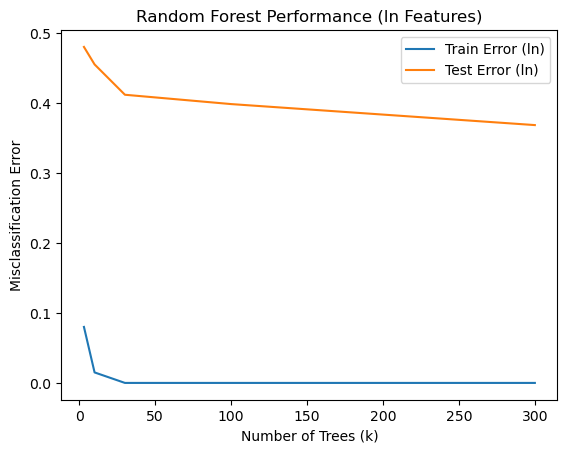

Table for d):
     K  Train Error (ln)  Test Error (ln)
0    3             0.080         0.480000
1   10             0.015         0.455000
2   30             0.000         0.411667
3  100             0.000         0.398333
4  300             0.000         0.368333


In [20]:
file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/MADELON"
train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
train_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)
k_values = [3, 10, 30, 100, 300]
sqrt_features = int(np.sqrt(500))


# Combine features and labels
train['Class'] = train_labels
test['Class'] = test_labels

# d) Random subset of ln(500) features
ln_features = int(np.log(500))

train_errors_d = []
test_errors_d = []

for k in k_values:
    model = RandomForestClassifier(n_estimators=k, max_features=ln_features)
    model.fit(train.drop('Class', axis=1), train['Class'])
    
    train_pred = model.predict(train.drop('Class', axis=1))
    test_pred = model.predict(test.drop('Class', axis=1))
    
    train_error = 1 - accuracy_score(train['Class'], train_pred)
    test_error = 1 - accuracy_score(test['Class'], test_pred)
    
    train_errors_d.append(train_error)
    test_errors_d.append(test_error)

# Plot errors
plt.plot(k_values, train_errors_d, label='Train Error (ln)')
plt.plot(k_values, test_errors_d, label='Test Error (ln)')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.legend()
plt.title('Random Forest Performance (ln Features)')
plt.savefig("1d.png")
plt.show()

# Report errors in a table
table_d = pd.DataFrame({'K': k_values, 'Train Error (ln)': train_errors_d, 'Test Error (ln)': test_errors_d})
print("Table for d):")
print(table_d)

## 1e

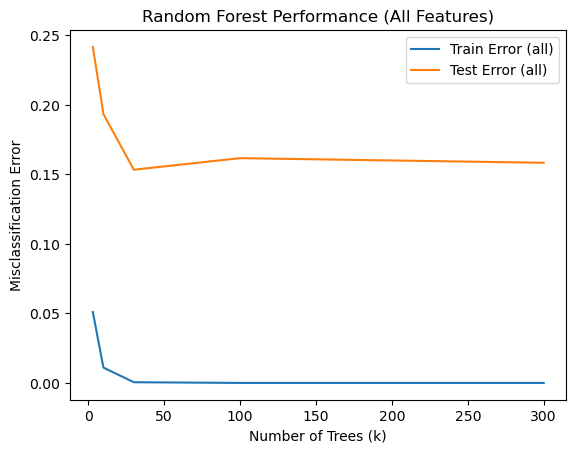

Table for e):
     K  Train Error (all)  Test Error (all)
0    3             0.0510          0.241667
1   10             0.0110          0.193333
2   30             0.0005          0.153333
3  100             0.0000          0.161667
4  300             0.0000          0.158333


In [21]:

k_values = [3, 10, 30, 100, 300]
sqrt_features = int(np.sqrt(500))


file_loc = "/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw1/data/MADELON"
train = pd.read_fwf(file_loc + "/madelon_train.data", header = None)
train_labels = pd.read_fwf(file_loc + "/madelon_train.labels", header = None)
test = pd.read_fwf(file_loc + "/madelon_valid.data", header = None)
test_labels = pd.read_fwf(file_loc + "/madelon_valid.labels", header = None)

# Combine features and labels
train['Class'] = train_labels
test['Class'] = test_labels

# e) All 500 features
train_errors_e = []
test_errors_e = []

for k in k_values:
    model = RandomForestClassifier(n_estimators=k, max_features=None)
    model.fit(train.drop('Class', axis=1), train['Class'])
    
    train_pred = model.predict(train.drop('Class', axis=1))
    test_pred = model.predict(test.drop('Class', axis=1))
    
    train_error = 1 - accuracy_score(train['Class'], train_pred)
    test_error = 1 - accuracy_score(test['Class'], test_pred)
    
    train_errors_e.append(train_error)
    test_errors_e.append(test_error)

# Plot errors
plt.plot(k_values, train_errors_e, label='Train Error (all)')
plt.plot(k_values, test_errors_e, label='Test Error (all)')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.legend()
plt.title('Random Forest Performance (All Features)')
plt.savefig("1e.png")
plt.show()

# Report errors in a table
table_e = pd.DataFrame({'K': k_values, 'Train Error (all)': train_errors_e, 'Test Error (all)': test_errors_e})
print("Table for e):")
print(table_e)
